<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from sklearn import datasets, cluster

In [4]:
help(datasets.make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

In [7]:
import matplotlib.pyplot as plt

In [18]:
plt.rcParams['figure.figsize'] = (10,10)

In [42]:
X, y = datasets.make_blobs(n_samples=1000, centers=4, 
                           n_features=2, cluster_std=2)

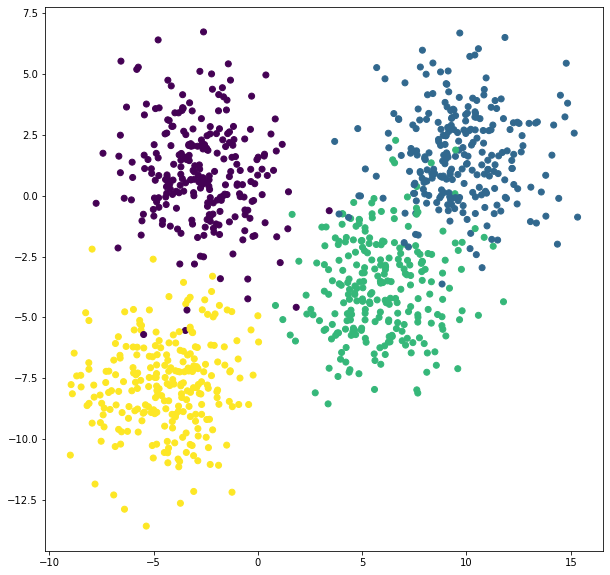

In [43]:
plt.scatter(X[:,0], X[:,1], c= y)

In [45]:
inertia = []
for k in range(2,6):
    model = cluster.KMeans(k)
    model.fit(X)
    inertia.append(model.inertia_)

In [46]:
inertia

[22951.96308428129, 13014.712543503409, 7211.3399915593045, 6516.50381299565]

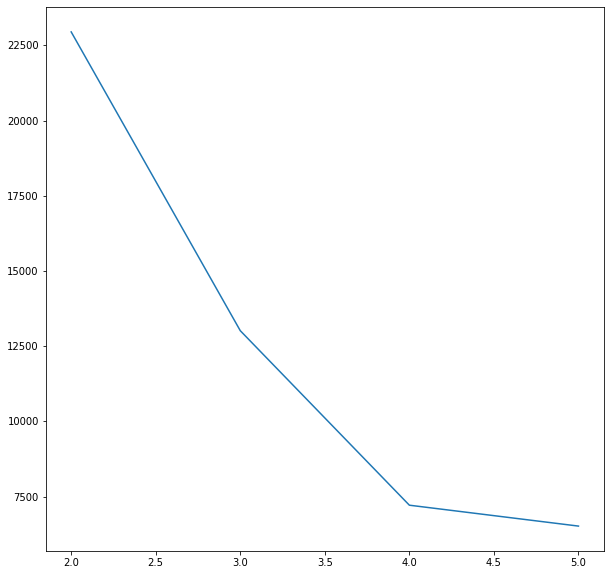

In [47]:
plt.plot(range(2,6), inertia)

In [53]:
model = cluster.KMeans(3)

In [54]:
model.fit(X)

KMeans(n_clusters=3)

In [55]:
model.inertia_

13014.712543503407

In [56]:
cl = model.predict(X)

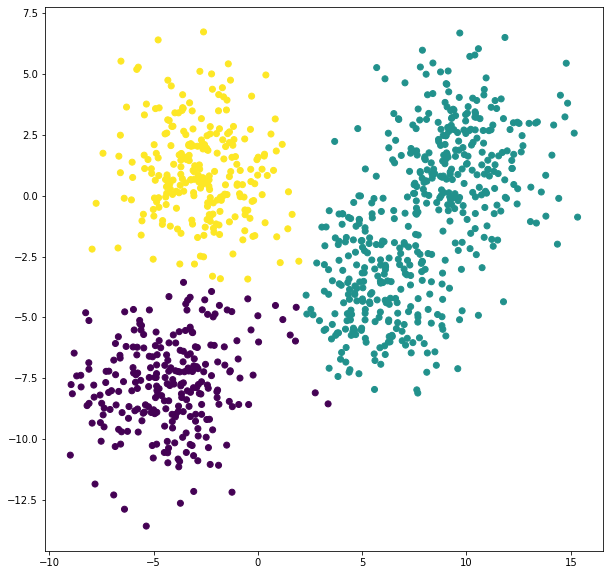

In [57]:
plt.scatter(X[:,0], X[:,1], c=cl)

In [90]:
bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)
bandwidth

In [92]:
model = cluster.MeanShift(bandwidth=bandwidth)

In [93]:
model.fit(X)

MeanShift(bandwidth=6.683862675304954)

In [94]:
cl_ms = model.predict(X)

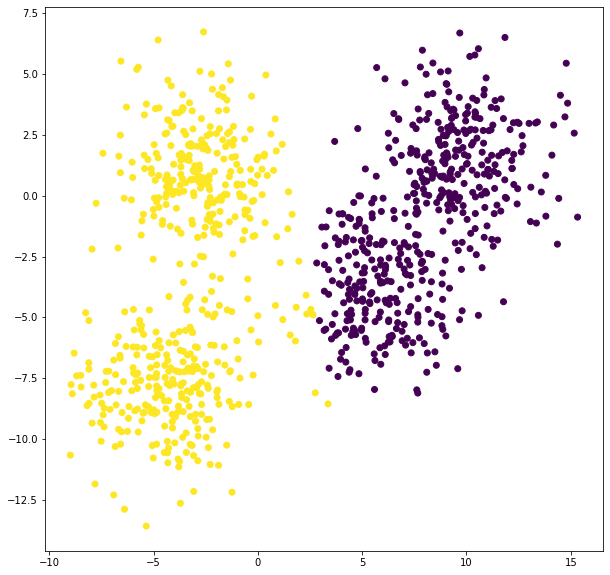

In [95]:
plt.scatter(X[:,0], X[:,1], c=cl_ms)

In [87]:
model = cluster.DBSCAN(eps=0.8, min_samples=10)

In [88]:
cl_db = model.fit_predict(X)

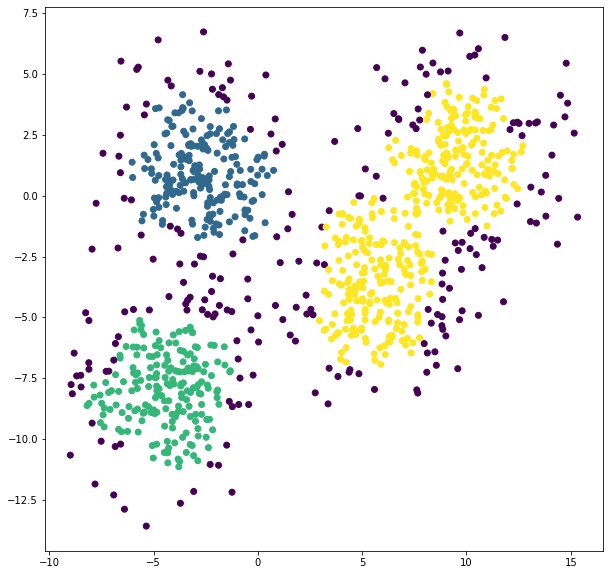

In [89]:
plt.scatter(X[:,0], X[:,1], c=cl_db)

In [81]:
import seaborn as sns

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

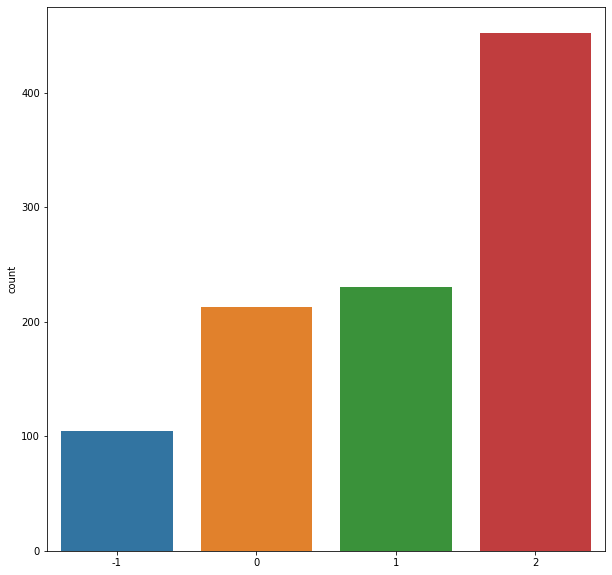

In [86]:
sns.countplot(cl_db)